## Global Power Plant Database

### Problem Statement:

#### Description:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Key attributes of the database:

The database includes the following indicators:

- country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long (text): longer form of the country designation
- name (text): name or title of the power plant, generally in Romanized form
- gppd_idnr (text): 10 or 12 character identifier for the power plant
- capacity_mw (number): electrical generating capacity in megawatts
- latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel (text): energy source used in primary electricity generation or export
- other_fuel1 (text): energy source used in electricity generation or export
- other_fuel2 (text): energy source used in electricity generation or export
- other_fuel3 (text): energy source used in electricity generation or export
- commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
- owner (text): majority shareholder of the power plant, generally in Romanized form
- source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url (text): web document corresponding to the `source` field
- geolocation_source (text): attribution for geolocation information
- wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data (number): year the capacity information was reported
- generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
- generation_data_source (text): attribution for the reported generation information
- estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
- estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014 
- estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015 
- estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016 
- estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017 
- estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
- estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014 
- estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
- estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
- estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017 


#### Fuel Type Aggregation:

- We define the "Fuel Type" attribute of our database based on common fuel categories. 

### Prediction :   
- Make two prediction:
    - Fuel Type
    - capacity_mw

#### Importing required libraries:

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#### Loading the database:

In [95]:
df = pd.read_csv('database_IND.csv')

df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


#### Exploratory Data Analysis (EDA):

In [96]:
# Checking for the shape of the dataset:

df.shape

(908, 25)

- The dataset contains 908 rows and 25 columns including the target columns.

- We've two target columns
    1. capacity_mw
    2. primary_fuel

In [97]:
# Checking for the columns of the dataset.

df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [98]:
# Checking for the datatype of the dataset

df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

- The dataset contains two datatypes: 'Object' and 'float'

In [99]:
# Checking for the missing values in the dataset

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [100]:
# Dropping country and country_long columns as it contains only 'India' as value.

df = df.drop('country', axis =1)
df = df.drop('country_long', axis =1)

df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


- The dataset contains missing values in some columns.

In [101]:
# Checking for the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      908 non-null    object 
 1   gppd_idnr                 908 non-null    object 
 2   capacity_mw               908 non-null    float64
 3   latitude                  862 non-null    float64
 4   longitude                 862 non-null    float64
 5   primary_fuel              908 non-null    object 
 6   other_fuel1               199 non-null    object 
 7   other_fuel2               1 non-null      object 
 8   other_fuel3               0 non-null      float64
 9   commissioning_year        528 non-null    float64
 10  owner                     342 non-null    object 
 11  source                    908 non-null    object 
 12  url                       908 non-null    object 
 13  geolocation_source        889 non-null    object 
 14  wepp_id   

- There are missing values in the dataset as said earlier.
- 13 columns contain float datatype and 12 columns contain object datatype.
- Following columns contains missing values:
    - latitude
    - longitude
    - other_fuel1
    - other_fuel2
    - other_fuel3
    - commissioning_year
    - owner
    - geolocation_source
    - wepp_id
    - year_of_capacity_data
    - generation_gwh_2013
    - generation_gwh_2014
    - generation_gwh_2015
    - generation_gwh_2016
    - generation_gwh_2017
    - generation_data_source
    - estimated_generation_gwh
    
- The column 'other_fuel2' contains only 1 value. So, it is better to drop this column.
- The columns 'other_fuel3', 'wepp_id', and 'estimated_generation_gwh' do not contain any values. So, we'll drop these columns.

In [102]:
# Dropping the 'other_fuel2' column:

df = df.drop('other_fuel2', axis = 1)

In [103]:
# Dropping the 'other_fuel3' column:

df = df.drop('other_fuel3', axis = 1)

In [104]:
# Dropping the 'wepp_id' column:

df = df.drop('wepp_id', axis =1)

In [105]:
# Dropping the 'estimated_generation_gwh' column.

df = df.drop('estimated_generation_gwh', axis =1)

In [106]:
# Dropping the url column as it is not contributing to the dataset.

df = df.drop('url', axis = 1)

In [107]:
# Checking the dataset again.

df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


#### Checking for the missing values again:

In [108]:
df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     566
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

#### Handling the missing values:

1. generation_gwh_2013

We'll replace the missing values with the mean value of the generation_gwh_2013 column.

In [109]:
# Checking for the mean

df['generation_gwh_2013'].mean()

2304.0592017964586

In [110]:
# Replacing the missing values

df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean(), inplace=True)

2. generation_gwh_2014

We'll replace the missing values with the mean value of the generation_gwh_2014 column.

In [111]:
# Checking for the mean value

df['generation_gwh_2014'].mean()

2420.3933164542264

In [112]:
# Replacing the missing values with the mean

df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace=True)

3. generation_gwh_2015

We'll replace the missing values with mean value of the generation_gwh_2015 column.

In [113]:
# Checking for the mean value.

df['generation_gwh_2015'].mean()

2414.072373401681

In [114]:
# Replacing the missing values with the mean

df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace=True)

4. generation_gwh_2016

We'll replace the missing values with mean value of the generation_gwh_2016 column.

In [115]:
# Checking for the mean value.

df['generation_gwh_2016'].mean()

2453.9362918708252

In [116]:
# Replacing the missing values with the mean

df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace=True)

5. generation_gwh_2017

We'll replace the missing values with mean value of the generation_gwh_2017 column.

In [117]:
# Checking for the mean value.

df['generation_gwh_2017'].mean()

2531.7544577527983

In [118]:
# Replacing the missing values with the mean

df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace=True)

6. other_fuel1 

We'll replace the missing values of other_fuel1 column with '0' to denote other fuel option is not avaiable in the respective plant.

In [119]:
# Checking for the value counts

df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [120]:
# Replacing the missing values with '0'

df['other_fuel1'].fillna('0', inplace=True)

7. commissioning_year

We'll replace the missing values with the median of the column commissioning_year

In [121]:
# Checking the median
df['commissioning_year'].median()

2000.0

In [122]:
# Replacing the missing values

df['commissioning_year'].fillna('2000', inplace=True)

8. latitude

We'll replace the missing values with the median of the column latitude

In [123]:
# Checking for the median
df['latitude'].median()

21.7783

In [124]:
# Replacing the missing values

df['latitude'].fillna('21.7783', inplace=True)

9. longitude

We'll replace the missing values with the median of the column longitude.

In [125]:
# Checking for the median
df['longitude'].median()

76.71924999999999

In [126]:
# Replacing the missing values

df['longitude'].fillna('76.72', inplace =True)

In [127]:
# Checking for the missing values again.

df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                     566
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source    458
dtype: int64

#### Analyzing the target column:

In [128]:
# Checking the value counts.

df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

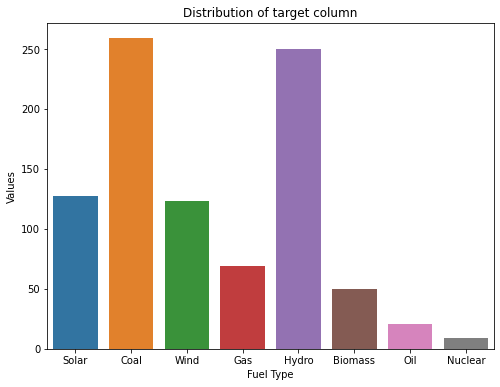

In [129]:
# Plotting bar plot to show the distribution of target coulmn.

plt.figure(figsize=[8,6])
sns.countplot(x='primary_fuel', data=df)
plt.xlabel('Fuel Type')
plt.ylabel('Values')
plt.title('Distribution of target column')
plt.show()

- We can see that the target column 'primary_fuel' is imbalanced. We'll balance it later.

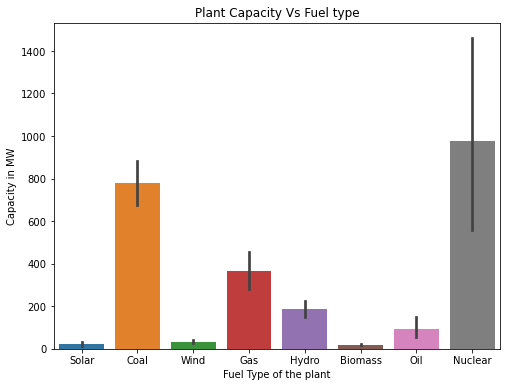

In [130]:
# Checking the distribution of capacity of plants fuel type wise

plt.figure(figsize=[8,6])
sns.barplot(x='primary_fuel', y='capacity_mw', data=df)
plt.xlabel('Fuel Type of the plant')
plt.ylabel('Capacity in MW')
plt.title('Plant Capacity Vs Fuel type')
plt.show()

- We can see that the Nuclear type power plants have highest capacity.
- Coal type power plants have the second highest capacity.

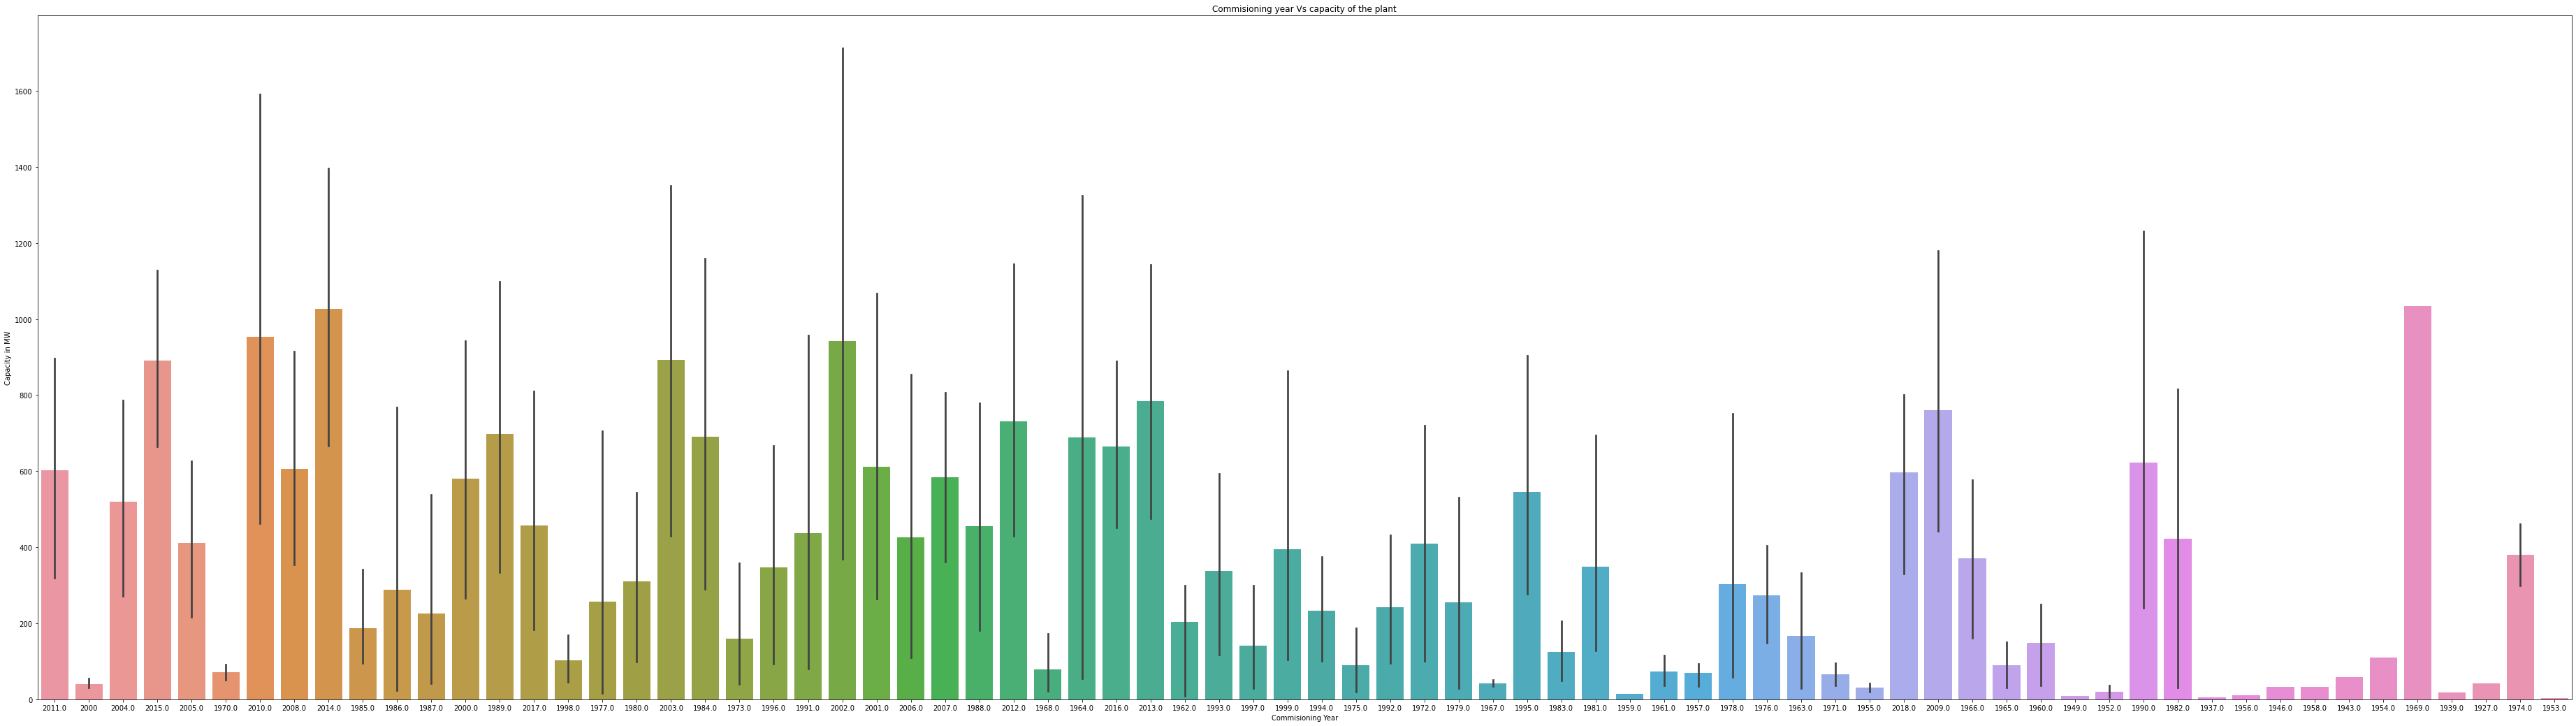

In [131]:
# Checking the distribution of capacity Vs commissioning_year

plt.figure(figsize=[65,18])
sns.barplot(x='commissioning_year', y='capacity_mw', data=df)
plt.xlabel('Commisioning Year')
plt.ylabel('Capacity in MW')
plt.title('Commisioning year Vs capacity of the plant')
plt.show()

- From the graph we can say that the new plants have more capacity than the older plants.

#### Label encoding the categorical variables:

In [132]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

variables = ['name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'owner', 'source']
for v in variables:
    df[v] = label.fit_transform(df[v])

In [133]:
# Dropping 'geolocation_source' 

df = df.drop('geolocation_source', axis=1)

In [134]:
# Dropping 'generation_data_source'

df = df.drop('generation_data_source', axis=1)

In [135]:
# Checking for the dataset again after label encoding

df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,658,2.5,28.1839,73.2407,6,0,2011,229,109,NaN,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,520,98.0,24.7663,74.609,1,0,2000,258,174,NaN,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,2,854,39.2,21.9038,69.3732,7,0,2000,2,21,NaN,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,3,0,135.0,23.8712,91.3602,2,0,2004,280,22,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,4,1,1800.0,21.9603,82.4091,1,3,2015,280,22,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


#### Checking for the data distribution among all the columns:

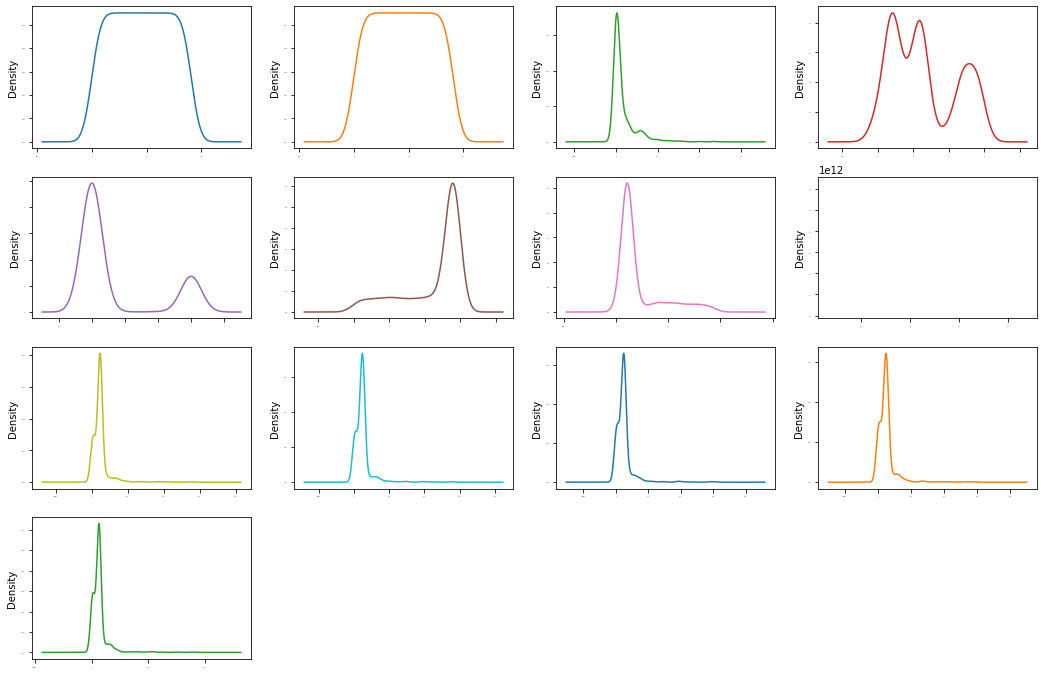

In [136]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

- This shows that there are skewness in the dataset.
- We'll check for the skewness later.

#### Checking for the Statistical Summary:

In [137]:
df.describe()

,name,gppd_idnr,capacity_mw,primary_fuel,other_fuel1,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.00000,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,520.0,908.000000,908.000000,908.000000,908.000000,908.000000
mean,453.50000,453.50000,321.046378,3.205947,0.653084,227.534141,43.823789,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,262.26132,262.26132,580.221767,2.281339,1.236045,83.895877,44.624092,0.0,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.75000,226.75000,16.837500,1.000000,0.000000,188.750000,22.000000,2018.0,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,453.50000,453.50000,60.000000,3.000000,0.000000,280.000000,22.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,680.25000,680.25000,388.125000,6.000000,0.000000,280.000000,29.250000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,907.00000,907.00000,4760.000000,7.000000,3.000000,280.000000,190.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


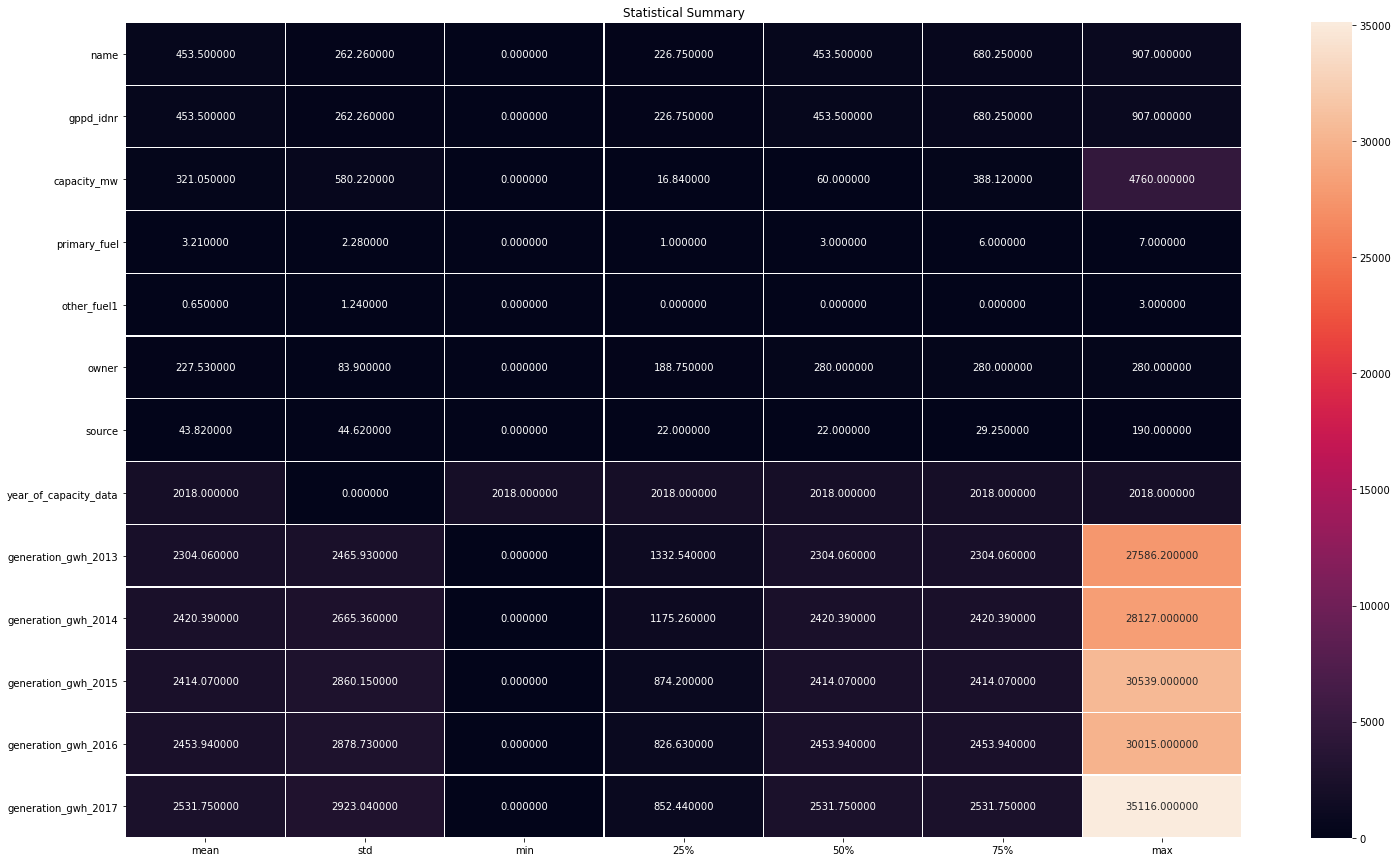

In [138]:
# Plotting Heatmap for Statistical Summary

plt.figure(figsize=[25,15])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Statistical Summary')
plt.show()

#### Checking for the Correlation of the variables:

In [139]:
df.corr()

,name,gppd_idnr,capacity_mw,primary_fuel,other_fuel1,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
name,1.000000,0.336792,0.059870,0.038752,0.019293,1.167146e-01,-1.380057e-02,NaN,8.269905e-02,8.491457e-02,7.514018e-02,6.780015e-02,7.526164e-02
gppd_idnr,0.336792,1.000000,-0.334308,0.607373,-0.383402,-6.021076e-01,4.165747e-01,NaN,4.418679e-02,4.539080e-02,3.996483e-02,2.794672e-02,2.407891e-02
capacity_mw,0.059870,-0.334308,1.000000,-0.377783,0.625123,3.036718e-01,-2.417009e-01,NaN,6.678419e-01,7.054341e-01,7.220814e-01,7.528288e-01,7.670398e-01
primary_fuel,0.038752,0.607373,-0.377783,1.000000,-0.497001,-2.601736e-01,5.360860e-02,NaN,-1.205116e-01,-1.249997e-01,-1.251376e-01,-1.313584e-01,-1.321741e-01
other_fuel1,0.019293,-0.383402,0.625123,-0.497001,1.000000,3.307876e-01,-2.586865e-01,NaN,3.427008e-01,3.578344e-01,3.540715e-01,3.734064e-01,3.830844e-01
owner,0.116715,-0.602108,0.303672,-0.260174,0.330788,1.000000e+00,-2.438403e-01,NaN,-4.798636e-17,-3.967998e-17,2.878648e-17,3.868733e-17,1.421944e-16
source,-0.013801,0.416575,-0.241701,0.053609,-0.258687,-2.438403e-01,1.000000e+00,NaN,1.148485e-16,1.129442e-17,3.266585e-17,2.296820e-17,-1.191072e-16
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,0.082699,0.044187,0.667842,-0.120512,0.342701,-4.798636e-17,1.148485e-16,NaN,1.000000e+00,9.634535e-01,8.963761e-01,8.735420e-01,8.306385e-01
generation_gwh_2014,0.084915,0.045391,0.705434,-0.125000,0.357834,-3.967998e-17,1.129442e-17,NaN,9.634535e-01,1.000000e+00,9.537116e-01,9.260100e-01,8.918721e-01


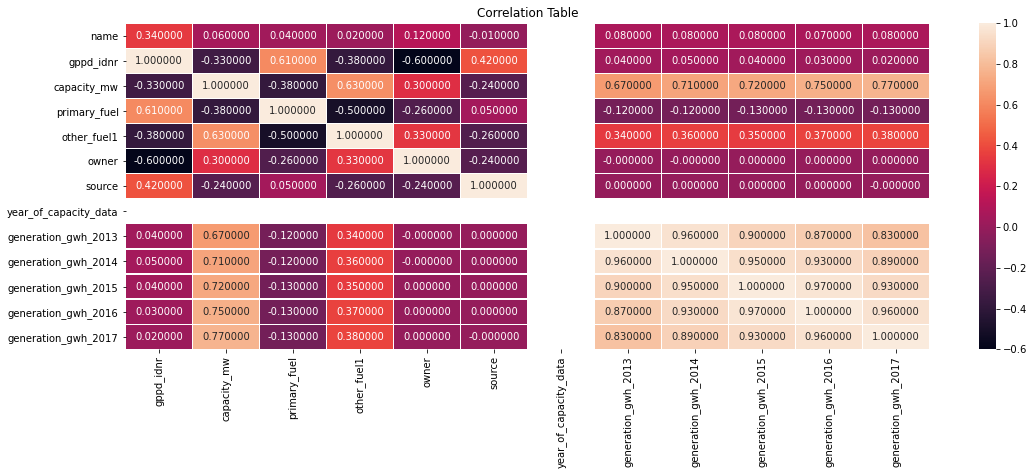

In [140]:
### Plotting heatmap for the correlation table

plt.figure(figsize=[18,6])
sns.heatmap(round(df.corr()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()

#### Outcomes of Correlation table

1. For 'capacity_mw' target column
    - name column has 6% correlation with the target column 'capacity_mw'
    - gppd_idnr has -33% correlation with the target column 'capacity_mw', which can be considered as very weak bond.
    - latitude has 5% correlation with the target column 'capacity_mw'.
    - longitude has 20% correlation with the target column 'capacity_mw'.
    - primary_fuel has -38% correlation with the target column 'capacity_mw', which can be considered as very weak bond.
    - other_fuel1 has 0% correlation with the target column.
    - owner column has 30% correlation with the target column, which can be considered as strong bond.
    - source has -24% correlation.(very weak bond)
    - year_of_capacity_data has no values so we'll drop this column.
    - generation_gwh_2013 has 67% correlation which can be considered as very strong bond.
    - generation_gwh_2014 has 71% correlation which can be considered as very strong bond.
    - generation_gwh_2015 has 72% correlation which can be considered as very strong bond.
    - generation_gwh_2016 has 75% correlation which can be considerd as very strong bond.
    - generation_gwh_2017 has 77% correlation which can be considered as very strong bond.
    
-----------------------------------------------------------------------------------------------------

2. For 'primary_fuel' as target column
    - name column has 4% correlation.
    - gppd_idnr has 61% correlation which can be considered as very strong bond.
    - capacity_mw has -38% correlation, which can be considerd as very weak bond.
    - latitude has -1% correlation.
    - longitude has -36% correlation which can be considerd as very weak bond.
    - otherfuel1 has 0% correlation.
    - owner has -26% correlation, which can be considered as very weak bond.
    - source has 5% correlation.
    - generation_gwh_2013 has -12% correlation.(weak bond)
    - generation_gwh_2014 has -12% correlation. (weak bond)
    - generation_gwh_2015 has -13% correlation. (weak bond)
    - generation_gwh_2016 has -13% correlation. (weak bond)
    - generation_gwh_2017 has -13% correlation. (weak bond)

In [141]:
# dropping the columns which are not contributing to the dataset

df = df.drop('other_fuel1', axis=1)
df = df.drop('year_of_capacity_data', axis=1)

#### Checking for outliers and skewness:

In [142]:
# Splitting the data in independent and target variable.
# 'primary_fuel' as target variable:
x = df.drop(['primary_fuel'],axis=1)
y = df['primary_fuel']

# 'capacity_mw' as target variable:

x1 = df.drop(['capacity_mw'], axis=1)
y1 = df['capacity_mw']

In [143]:
#cheking for skewness in x

x.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            3.193257
latitude              -0.161811
longitude              1.150944
commissioning_year    -1.650230
owner                 -1.375607
source                 1.829145
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
dtype: float64

- Following columns have skewness:
    - capacity_mw
    - longitude
    - commissioning_year
    - source
    - generation_gwh_2013
    - generation_gwh_2014
    - generation_gwh_2015
    - generation_gwh_2016
    - generation_gwh_2017

#### Remove the skewness:
We're using power_transform function to remove skewness from the dataset.

In [144]:
# Removing skewness from 'x'
from sklearn.preprocessing import power_transform

df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns=x.columns)

df_new.skew()

name                  -0.288181
gppd_idnr             -0.288181
capacity_mw            0.020461
latitude              -0.077161
longitude              0.002083
commissioning_year    -0.426588
owner                 -1.026460
source                -0.214850
generation_gwh_2013    0.180340
generation_gwh_2014    0.124543
generation_gwh_2015    0.070937
generation_gwh_2016    0.038668
generation_gwh_2017    0.013392
dtype: float64

#### Standard Scaler:

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-1.73014431e+00,  7.80186355e-01, -5.49310543e-01, ...,
         0.00000000e+00, -1.58055100e-16, -1.55659091e-16],
       [-1.72632922e+00,  2.53703631e-01, -3.84627594e-01, ...,
         0.00000000e+00, -1.58055100e-16, -1.55659091e-16],
       [-1.72251413e+00,  1.52794443e+00, -4.86024006e-01, ...,
         0.00000000e+00, -1.58055100e-16, -1.55659091e-16],
       ...,
       [ 1.72251413e+00,  1.67291793e+00, -5.09648681e-01, ...,
         0.00000000e+00, -1.58055100e-16, -1.55659091e-16],
       [ 1.72632922e+00,  3.30005475e-01, -4.15667312e-01, ...,
         0.00000000e+00, -1.58055100e-16, -1.55659091e-16],
       [ 1.73014431e+00,  1.61569155e+00, -5.25168540e-01, ...,
         0.00000000e+00, -1.58055100e-16, -1.55659091e-16]])

#### Handling data imbalance by oversampling:

In [148]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x,y)

In [149]:
y_over.value_counts()

7    259
5    259
3    259
1    259
6    259
4    259
2    259
0    259
Name: primary_fuel, dtype: int64

#### Finding best RandomState:

In [150]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,600):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.8006430868167203  on Random_State  212


#### Data preprocessing: (for fuel_type prediction)

In [151]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state=212)

#### Model Training for fuel_type prediction

#### LogisticRegression:

In [152]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8006430868167203
[[82  2  0  0  0  9  1  0]
 [ 7 38  9  2  5  1  1  0]
 [ 3 10 42 10  3 10  0  0]
 [ 0  6  5 53  6  8  0  0]
 [ 0  0  0  7 67  0  0  0]
 [ 4  1  3  3  0 54  0  0]
 [ 4  0  0  0  0  0 74  1]
 [ 0  0  0  0  0  0  3 88]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85        94
           1       0.67      0.60      0.63        63
           2       0.71      0.54      0.61        78
           3       0.71      0.68      0.69        78
           4       0.83      0.91      0.86        74
           5       0.66      0.83      0.73        65
           6       0.94      0.94      0.94        79
           7       0.99      0.97      0.98        91

    accuracy                           0.80       622
   macro avg       0.79      0.79      0.79       622
weighted avg       0.80      0.80      0.80       622



From LogisticRegression, we're getting 80% accuracy score

#### RandomForestClassifier:

In [153]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.9292604501607717
[[89  5  0  0  0  0  0  0]
 [ 3 49  3  3  4  1  0  0]
 [ 0  4 69  4  0  1  0  0]
 [ 0  7  5 64  1  1  0  0]
 [ 0  0  0  0 74  0  0  0]
 [ 0  0  0  1  0 64  0  0]
 [ 0  0  0  0  0  0 78  1]
 [ 0  0  0  0  0  0  0 91]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        94
           1       0.75      0.78      0.77        63
           2       0.90      0.88      0.89        78
           3       0.89      0.82      0.85        78
           4       0.94      1.00      0.97        74
           5       0.96      0.98      0.97        65
           6       1.00      0.99      0.99        79
           7       0.99      1.00      0.99        91

    accuracy                           0.93       622
   macro avg       0.92      0.93      0.92       622
weighted avg       0.93      0.93      0.93       622



From RandomForest Classifier, we're getting 93% accuracy score.

#### DecisionTreeClassifier:

In [154]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.8922829581993569
[[88  5  0  0  0  1  0  0]
 [ 2 45  7  4  4  1  0  0]
 [ 0  4 57 16  0  1  0  0]
 [ 0  6  4 65  2  1  0  0]
 [ 0  4  0  0 70  0  0  0]
 [ 0  1  3  0  0 61  0  0]
 [ 0  0  0  0  0  0 78  1]
 [ 0  0  0  0  0  0  0 91]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        94
           1       0.69      0.71      0.70        63
           2       0.80      0.73      0.77        78
           3       0.76      0.83      0.80        78
           4       0.92      0.95      0.93        74
           5       0.94      0.94      0.94        65
           6       1.00      0.99      0.99        79
           7       0.99      1.00      0.99        91

    accuracy                           0.89       622
   macro avg       0.89      0.89      0.89       622
weighted avg       0.89      0.89      0.89       622



From DecisionTree Classifier, we're getting 89% accuracy score.

#### K-Nearest Neighbors:

In [155]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.860128617363344
[[88  3  1  0  0  1  1  0]
 [ 7 37  4  3  7  4  1  0]
 [ 0  2 66  5  0  5  0  0]
 [ 0 11 11 45  5  6  0  0]
 [ 0  0  0  0 74  0  0  0]
 [ 1  0  0  0  0 64  0  0]
 [ 5  0  0  0  0  0 73  1]
 [ 1  0  0  0  0  0  2 88]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        94
           1       0.70      0.59      0.64        63
           2       0.80      0.85      0.83        78
           3       0.85      0.58      0.69        78
           4       0.86      1.00      0.92        74
           5       0.80      0.98      0.88        65
           6       0.95      0.92      0.94        79
           7       0.99      0.97      0.98        91

    accuracy                           0.86       622
   macro avg       0.85      0.85      0.85       622
weighted avg       0.86      0.86      0.85       622



From KNN, we're getting 86% accuracy score.

- As of now, we're getting highest accuracy score from RandomForest. Let's check for the cross validation score to decide the best model.

#### Selecting the best model to predict the fuel type:

Checking for the cross validation score:

In [157]:
#Checking cross validation score of LogisticRegression Classifier:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for LogisticRegression is ',scr.mean())

Cross validation score for LogisticRegression is  0.7543925687572097


In [158]:
# Checking cross validation score of RandomForest Classifier:

scr = cross_val_score(RF,x,y,cv=5)
print('Cross validation score for RandomForest is', scr.mean())

Cross validation score for RandomForest is 0.8413939651508713


In [159]:
# Checking cross validation score of DecisionTree Classifier:
scr = cross_val_score(dt,x,y,cv=5)
print('Cross validation score for DecisionTree is ', scr.mean())

Cross validation score for DecisionTree is  0.7676340234351283


In [160]:
# Checking cross validation score of KNN:

scr = cross_val_score(knn,x,y,cv=5)
print('Cross validation score for K-Nearest Neighbors is', scr.mean())

Cross validation score for K-Nearest Neighbors is 0.731248861635602


#### Best Model for predicting fuel type:

The minimum diffrence between the accuracy score and cross validation score is (4.63), which is of LogisticRegression.

So, the best model for the dataset is LogisticRegression.

#### Hyper parameter tuning:

In [161]:
from sklearn.model_selection import GridSearchCV

#Defining parameters

params = {'random_state' : [5,7,9,11,13,15],
          'max_iter':[1,10,50,100]}

GCV=GridSearchCV(lr,params, verbose = 1, cv=3)

In [162]:
GCV.fit(x_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'max_iter': [1, 10, 50, 100],
                         'random_state': [5, 7, 9, 11, 13, 15]},
             verbose=1)

In [163]:
# Finding the best parameter found by GridSearchCV

GCV.best_params_

{'max_iter': 100, 'random_state': 5}

In [166]:
model1 = LogisticRegression(max_iter = 100, random_state = 5)
model1.fit(x_train, y_train)
pred1 = model1.predict(x_test)

print(accuracy_score(y_test,pred1)*100)
print(classification_report(y_test,pred1))

80.06430868167203
              precision    recall  f1-score   support

           0       0.82      0.87      0.85        94
           1       0.67      0.60      0.63        63
           2       0.71      0.54      0.61        78
           3       0.71      0.68      0.69        78
           4       0.83      0.91      0.86        74
           5       0.66      0.83      0.73        65
           6       0.94      0.94      0.94        79
           7       0.99      0.97      0.98        91

    accuracy                           0.80       622
   macro avg       0.79      0.79      0.79       622
weighted avg       0.80      0.80      0.80       622



After hyper parameter tuning we're getting 80% accuracy score.

#### Saving the model for the prediction of fuel type.

In [168]:
import pickle
filename = 'global_power_plant_fueltype.pkl'
pickle.dump(model1, open(filename, 'wb'))

#### Conclusion:

In [169]:
a = np.array(y_test)
predicted = np.array(model1.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,7,7
1,6,6
2,6,6
3,7,7
4,7,7
...,...,...
617,6,6
618,3,3
619,2,3
620,4,4


#### Now we'll predict the capacity_mw

In [171]:
#checking for the skewness in the x1.

x1.skew()

name                   0.000000
gppd_idnr              0.000000
latitude              -0.161811
longitude              1.150944
primary_fuel           0.471141
commissioning_year    -1.650230
owner                 -1.375607
source                 1.829145
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
dtype: float64

In [172]:
# Removing the skewness using power_transform technique

from sklearn.preprocessing import power_transform

df_new1 = power_transform(x1)

df_new1 = pd.DataFrame(df_new1, columns=x1.columns)

df_new1.skew()


name                  -0.288181
gppd_idnr             -0.288181
latitude              -0.077161
longitude              0.002083
primary_fuel          -0.047088
commissioning_year    -0.426588
owner                 -1.026460
source                -0.214850
generation_gwh_2013    0.180340
generation_gwh_2014    0.124543
generation_gwh_2015    0.070937
generation_gwh_2016    0.038668
generation_gwh_2017    0.013392
dtype: float64

#### Standard Scaler:

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)
x1

array([[-1.73014431e+00,  7.80186355e-01,  1.14329794e+00, ...,
         0.00000000e+00, -1.58055100e-16, -1.55659091e-16],
       [-1.72632922e+00,  2.53703631e-01,  5.81755687e-01, ...,
         0.00000000e+00, -1.58055100e-16, -1.55659091e-16],
       [-1.72251413e+00,  1.52794443e+00,  1.11421333e-01, ...,
         0.00000000e+00, -1.58055100e-16, -1.55659091e-16],
       ...,
       [ 1.72251413e+00,  1.67291793e+00, -9.77618351e-01, ...,
         0.00000000e+00, -1.58055100e-16, -1.55659091e-16],
       [ 1.72632922e+00,  3.30005475e-01,  5.13353874e-01, ...,
         0.00000000e+00, -1.58055100e-16, -1.55659091e-16],
       [ 1.73014431e+00,  1.61569155e+00, -1.85525815e+00, ...,
         0.00000000e+00, -1.58055100e-16, -1.55659091e-16]])

#### Data Preproccessing for the prediction of capacity_mw:

In [174]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

#### Model Training for the prediction of capacity_mw:

###### 1. LinerRegression:

In [175]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression( fit_intercept = True)

LR.fit(x1_train, y1_train)
print(f"Linear coefficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")

Linear coefficients : [ 33.88821157 -91.01060943  12.46957467 -16.44844104 -83.58772215
  84.70257561  87.15521008 -89.8879628   45.11404331  -7.11102561
 -13.12314895  56.79424468 353.2217114 ]
Intercept : 325.87843174104995


In [176]:
# Predicting the new result

y1_pred = LR.predict(x1_test)
y1_pred

array([ 4.33903218e+02, -1.41366319e+02,  1.51218632e+02,  9.99654594e+01,
        4.43421189e+02,  2.42204359e+02, -9.39999092e+01,  2.06551734e+02,
        4.20561553e+02,  4.51683671e+02,  2.31002967e+02,  2.93478415e+02,
        5.27149272e+01,  1.53468316e+02, -1.35075630e+01,  1.29108567e+02,
       -5.85579230e+01,  1.06881418e+02,  1.49234706e+03,  1.92127674e+02,
        1.22228095e+03,  2.78784361e+02, -8.12388857e+01,  3.07371204e+02,
        1.96676873e+02,  2.47594134e+01, -5.79941083e+01, -4.22986547e+01,
        4.30510404e+03, -7.92961799e+01,  6.29314337e+01,  3.48985968e+02,
        5.93199157e+02, -7.98769674e+01,  1.26667454e+02, -1.92703564e+01,
        2.26449632e+02,  3.91474327e+02,  2.32404963e+02,  1.33094728e+02,
        1.78573080e+02,  2.26839945e+02,  3.42992870e+02,  2.25929707e+02,
        8.72362436e+01,  2.43019368e+02,  1.43082406e+02,  1.40758470e+02,
        5.18606081e+02, -5.99821386e+01,  8.26599397e+01,  3.43249004e+03,
        6.82236163e+01,  

#### Ridge Regression:

In [177]:
# Importing the library
from sklearn.linear_model import Ridge

rid = Ridge(alpha=0.5)
rid.fit(x1_train,y1_train)

print(f"Ridge Coefficients : {rid.coef_}")
print(f"Intercept : {rid.intercept_}")

Ridge Coefficients : [ 33.91157393 -91.05988638  12.44193639 -16.38624971 -83.5335845
  84.65457315  87.08155709 -89.80659373  44.20525847  -5.97408409
 -13.06101526  59.09827854 350.48808454]
Intercept : 325.88596774619657


In [178]:
# Predicting the new result

rid_pred = rid.predict(x1_test)

rid_pred

array([ 4.33917541e+02, -1.41174042e+02,  1.51308548e+02,  1.00165773e+02,
        4.43388647e+02,  2.42242476e+02, -9.38065611e+01,  2.06454696e+02,
        4.20148279e+02,  4.51654181e+02,  2.31054849e+02,  2.93536758e+02,
        5.28705397e+01,  1.53536808e+02, -1.34800307e+01,  1.29072220e+02,
       -5.84914249e+01,  1.07001724e+02,  1.49370975e+03,  1.92227094e+02,
        1.22205239e+03,  2.78740323e+02, -8.11276934e+01,  3.07343747e+02,
        1.96755001e+02,  2.48162172e+01, -5.76561494e+01, -4.21782957e+01,
        4.30540678e+03, -7.92897306e+01,  6.31316315e+01,  3.47883642e+02,
        5.92472798e+02, -7.96515870e+01,  1.26752431e+02, -1.92150306e+01,
        2.26549040e+02,  3.91302963e+02,  2.32441098e+02,  1.33254448e+02,
        1.78608433e+02,  2.26869816e+02,  3.43205968e+02,  2.26060350e+02,
        8.72959922e+01,  2.43285247e+02,  1.43205767e+02,  1.40824453e+02,
        5.16376833e+02, -5.98605476e+01,  8.27330244e+01,  3.43098705e+03,
        6.83246210e+01,  

#### RandomForestRegressor:

In [179]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=2, random_state=0)

RF.fit(x1_train,y1_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [180]:
# Predicting the new result

rf_pred = RF.predict(x1_test) 
rf_pred

array([ 114.55630741,  102.04701895,  162.64393398,  162.64393398,
        114.55630741,  102.04701895,  162.64393398,  102.04701895,
        206.50870434,  206.50870434,  102.04701895,  102.04701895,
        162.64393398,  102.04701895,  102.04701895,  102.04701895,
        102.04701895,  162.64393398, 1318.82957287,  102.04701895,
       1299.34536523,  162.64393398,  102.04701895,  195.03211969,
        102.04701895,  102.04701895,  162.64393398,  102.04701895,
       3289.55175568,  102.04701895,  162.64393398,  206.50870434,
        363.82192974,  162.64393398,  102.04701895,  162.64393398,
        102.04701895,  206.50870434,  102.04701895,  102.04701895,
        102.04701895,  102.04701895,  206.50870434,  206.50870434,
        102.04701895,  162.64393398,  162.64393398,  102.04701895,
        158.42107777,  102.04701895,  102.04701895, 3309.65849527,
        102.04701895,  206.50870434,  102.04701895,  102.04701895,
        206.50870434,  102.04701895,  704.5508784 ,  102.04701

#### KNeighborsRegressor:

In [181]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(x1_train, y1_train)

KNeighborsRegressor(n_neighbors=2)

In [182]:
# Predicting the new result

knn_pred = KNN.predict(x1_test)
knn_pred

array([1.187500e+01, 1.550000e+00, 2.385000e+02, 5.278000e+02,
       5.300000e+00, 1.360000e+01, 2.055000e+02, 8.125000e+01,
       2.915000e+02, 5.360100e+02, 1.027500e+02, 1.000000e+02,
       1.455000e+02, 1.890000e+01, 1.320000e+01, 1.792500e+01,
       7.725000e+00, 3.015000e+02, 1.650000e+03, 2.000000e+01,
       1.045000e+03, 3.775000e+02, 3.000000e+00, 3.970000e+02,
       1.402500e+02, 1.170000e+01, 4.025000e+02, 7.000000e+01,
       3.140000e+03, 5.000000e+01, 4.500000e+01, 9.450000e+01,
       6.375000e+02, 1.248250e+02, 1.550000e+01, 8.110000e+01,
       2.700000e+01, 3.300000e+02, 1.825000e+01, 3.250000e+01,
       4.730000e+01, 3.525000e+01, 1.950000e+02, 3.000000e+01,
       5.425000e+00, 2.942850e+02, 2.650000e+02, 3.064000e+02,
       5.342850e+02, 9.850000e+00, 7.950000e+00, 2.790000e+03,
       6.450000e+00, 4.650000e+01, 8.125000e+00, 1.940000e+01,
       2.460000e+02, 4.330000e+01, 5.400000e+02, 2.100000e+00,
       4.800000e+01, 8.340000e+01, 2.325000e+01, 1.7550

#### Root Mean Squared Error:

In [183]:
from sklearn import metrics
rmse_LR = np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
rmse_Ridge = np.sqrt(metrics.mean_squared_error(y1_test, rid_pred))
rmse_RF = np.sqrt(metrics.mean_squared_error(y1_test, rf_pred))
rmse_KNN = np.sqrt(metrics.mean_squared_error(y1_test, knn_pred))
print('Root Mean Squared Error for LinearRegression is :', rmse_LR)
print('Root Mean Squared Error for Ridge Regression is :', rmse_Ridge)
print('Root Mean Squared Error for RandomForestRegressor is :', rmse_RF)
print('Root Mean Squared Error for KNeighborsRegressor is :', rmse_KNN)

Root Mean Squared Error for LinearRegression is : 235.11354209401927
Root Mean Squared Error for Ridge Regression is : 235.0121302335793
Root Mean Squared Error for RandomForestRegressor is : 224.95847876195336
Root Mean Squared Error for KNeighborsRegressor is : 245.09182048396522


- Root Mean Squared Error is least for the RandomForestRegressor so, it is the best fit model

#### R-Squred:

In [184]:
from sklearn.metrics import r2_score
print('R2 Score for LinearRegression is :', r2_score(y1_test, y1_pred))
print('R2 Score for Ridge_Regression is :', r2_score(y1_test, rid_pred))
print('R2 Score for RandomForestRegressor is :', r2_score(y1_test, rf_pred))
print('R2 score for KNeighborsRegressor is :', r2_score(y1_test, knn_pred))

R2 Score for LinearRegression is : 0.8212782907516151
R2 Score for Ridge_Regression is : 0.8214324340820334
R2 Score for RandomForestRegressor is : 0.8363836298553262
R2 score for KNeighborsRegressor is : 0.8057863922645492


- R2 Score closest to 1.0 is considered as best. From the above observation we can that RandomForestRegressor have the closest value i.e. 0.83. So, this is the best model.

Also RandomForestRegressor has the lowest Root Mean Squared error (RMSE). So, from both the observations we can say that the best fit model id RandomForestRegressor.

#### Model Saving for prediction of capacity_mw:

In [185]:
import pickle
filename = 'global_power_plant_capacity_mw.pkl'
pickle.dump(RF, open(filename,'wb'))